- credit Score=> credit score of customers
- Geography=> customer location
- Tenure=>how many years customer been in the bank
- balance=>customer available balance
- Num of products customer is using

- credit score 
670-739 =>good,
740-799=> v.good,
800<= => Excellent


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
DF=pd.read_csv('C:/Users/dell/Desktop/Data Science Diploma/data analysis project/Churn_Modelling.csv')

In [3]:
DF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
DF.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Since surname won't affect our analysis 

In [6]:
DF=DF.drop('Surname', axis=1)

In [7]:
DF

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Does credit score affect people's decision to leave bank

In [8]:
DF['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [9]:
DF[DF['Exited']==1]['CreditScore'].value_counts()

850    43
651    17
705    16
637    14
727    13
       ..
836     1
800     1
838     1
776     1
486     1
Name: CreditScore, Length: 420, dtype: int64

In [10]:
def creditscoreclassification(x):
    if x in range(350,670):
        return 1
    elif x in range(671,739):
        return 2
    elif x in range (740, 799):
        return 3
    else:
        return 4

In [11]:
DF['CreditScore'].apply(creditscoreclassification)

0       1
1       1
2       1
3       2
4       4
       ..
9995    3
9996    1
9997    2
9998    3
9999    3
Name: CreditScore, Length: 10000, dtype: int64

In [12]:
DF['credit_score_classification']=DF['CreditScore'].apply(creditscoreclassification)

In [13]:
DF['credit_score_classification'].isna().sum()

0

In [93]:
DF['credit_score_classification'].value_counts()

1    5693
2    2351
3    1212
4     744
Name: credit_score_classification, dtype: int64

## According to the classification to credit score 1-> below average, 2-> good, 3-> very good, 4-> excellent
- so it is normal to see that people who exit the bank are mostly from category 1

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

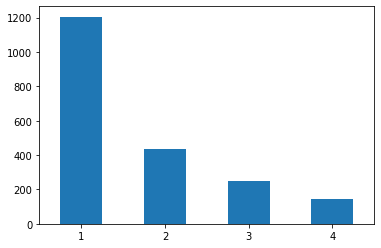

In [95]:
DF[DF['Exited']==1]['credit_score_classification'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)

More digging into creditscore 
- its relationship with age, salary, balance

In [16]:
DF['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [17]:
def Ageclassification(x):
    if x in range(18,24):
        return 1
    elif x in range(24,35):
        return 2
    elif x in range(35,50):
        return 3
    else:
        return 4

In [18]:
DF['Age_Category']=DF['Age'].apply(Ageclassification)

In [19]:
DF['Age_Category'].isna().sum()

0

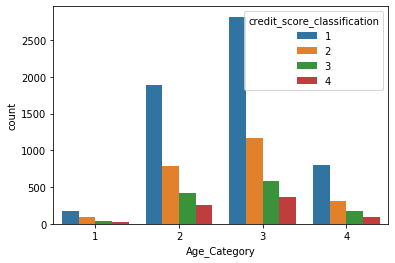

In [20]:
sns.countplot(data = DF, x = 'Age_Category', hue='credit_score_classification')

salary and creditscore

In [21]:
DF['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

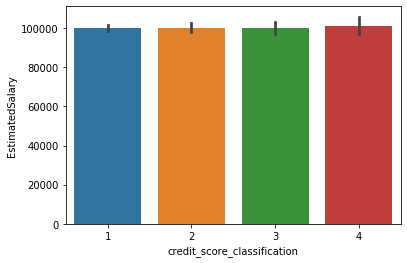

In [22]:
sns.barplot(data =DF, x='credit_score_classification', y='EstimatedSalary')

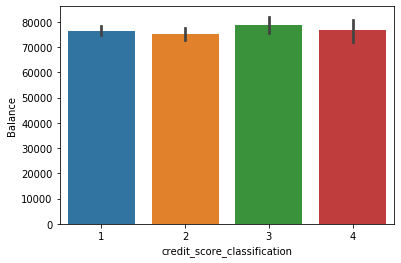

In [23]:
sns.barplot(data =DF, x='credit_score_classification', y='Balance')

Does Geography has anything to do with churn
- people in Germany are with the highest rates to exit 

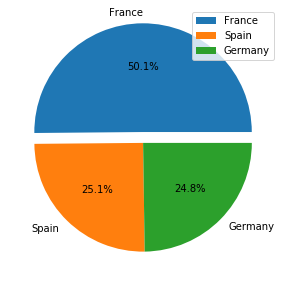

In [24]:
explode=(0.1,0,0)
fig1,ax1=plt.subplots(figsize=(10,5))
ax1.pie(DF['Geography'].value_counts(), explode=explode, labels=DF['Geography'].unique(),autopct='%1.1f%%')
plt.legend()
plt.show()

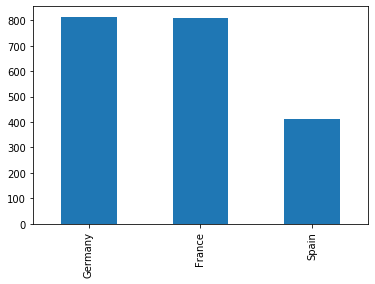

In [25]:
DF[DF['Exited']==1]['Geography'].value_counts().plot(kind='bar')


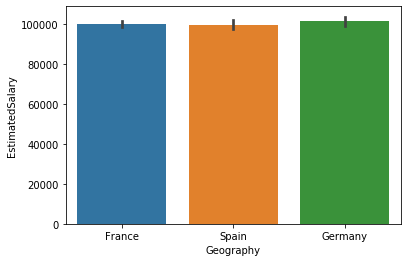

In [26]:
sns.barplot(data=DF, x='Geography', y='EstimatedSalary')

Gender:
-Female tend to leave banks more than males

In [27]:
DF['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

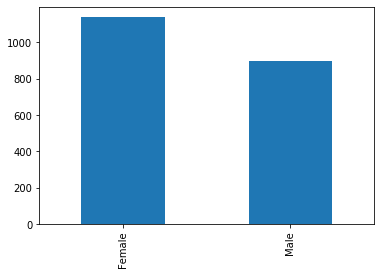

In [28]:
DF[DF['Exited']==1]['Gender'].value_counts().plot(kind='bar')

Males have higher balance than females 

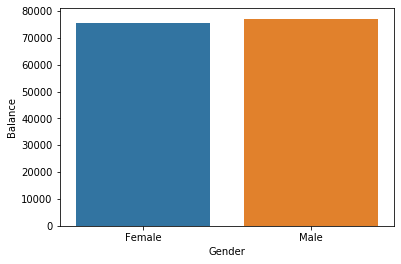

In [29]:
sns.barplot(data=DF, x='Gender', y='Balance', ci=None)

Males are more active members than females

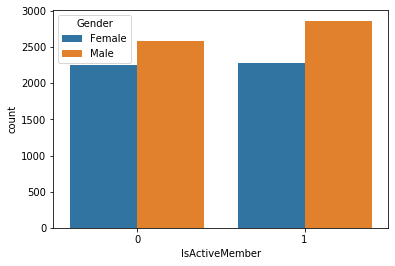

In [30]:
sns.countplot(data = DF, x = 'IsActiveMember', hue = 'Gender')

Males most probably have credit cards more than females

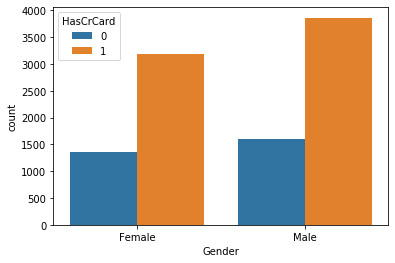

In [31]:
sns.countplot(data=DF, x='Gender', hue='HasCrCard')

Age

In [44]:
DF['Age_Category'].value_counts()

3    4926
2    3354
4    1395
1     325
Name: Age_Category, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

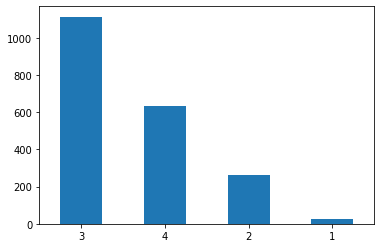

In [43]:
DF[DF['Exited']==1]['Age_Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)

Text(0.5, 1.0, 'Age Category VS Balance')

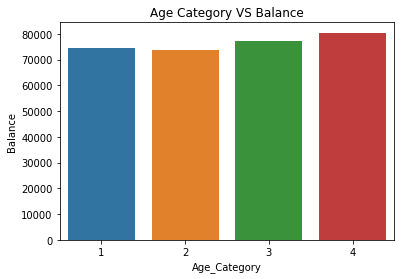

In [45]:
sns.barplot(data=DF, x='Age_Category', y='Balance', ci=None)
plt.title('Age Category VS Balance')

Text(0.5, 1.0, 'Age categories VS ISActive clients')

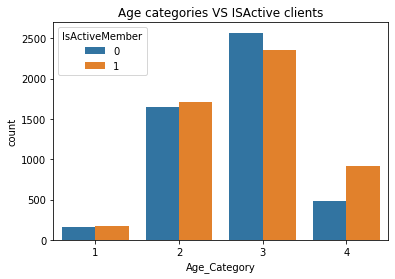

In [73]:
sns.countplot(data=DF, x='Age_Category', hue='IsActiveMember')
plt.title('Age categories VS ISActive clients')

Tenure from 0 to 10 years

In [47]:
DF['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

People who exit more are with 1 year Tenure 

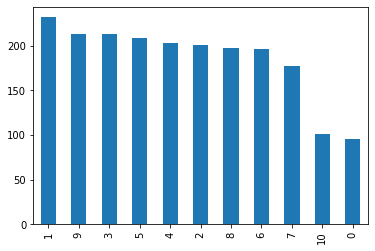

In [56]:
DF[DF['Exited']==1]['Tenure'].value_counts().plot(kind='bar')

People witth Age category 3 have highest exit rate 

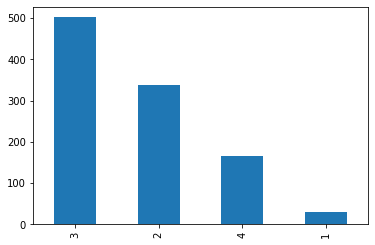

In [69]:
DF[DF['Tenure']==1]['Age_Category'].value_counts().plot(kind='bar')

We can't rely on the Credit card as indicator as people who have credit cards are more than half the data

In [100]:
DF['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

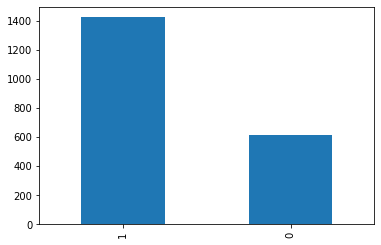

In [72]:
DF[DF['Exited']==1]['HasCrCard'].value_counts().plot(kind='bar')

Makes sense that people with Credit cards are more active

(array([0, 1]), <a list of 2 Text xticklabel objects>)

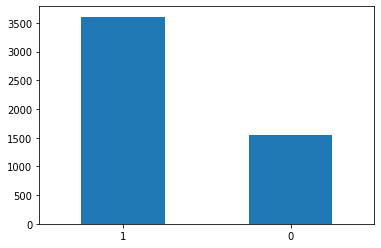

In [76]:
DF[DF['IsActiveMember']==1]['HasCrCard'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

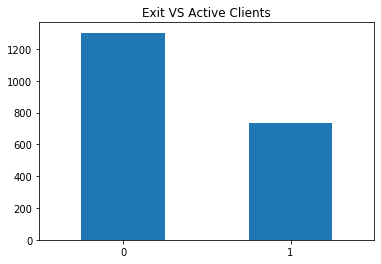

In [80]:
DF[DF['Exited']==1]['IsActiveMember'].value_counts().plot(kind='bar')
plt.title('Exit VS Active Clients')
plt.xticks(rotation=360)

Being active has nothing to do with balance 

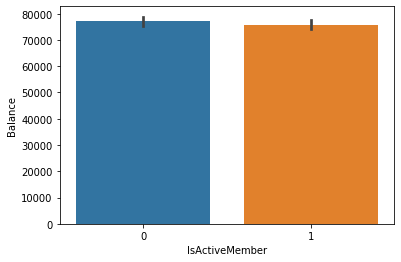

In [83]:
sns.barplot(data=DF, x='IsActiveMember', y='Balance')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

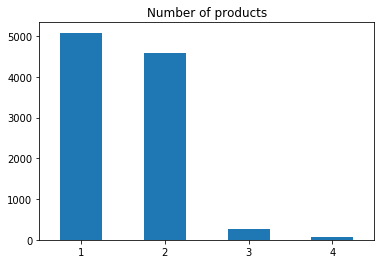

In [86]:
DF['NumOfProducts'].value_counts().plot(kind='bar')
plt.title('Number of products')
plt.xticks(rotation=360)

People who stays in the bank mostly have 2 products

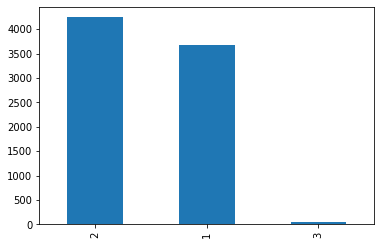

In [103]:
DF[DF['Exited']==0]['NumOfProducts'].value_counts().plot(kind='bar')

In [101]:
DF['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [90]:
DF['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

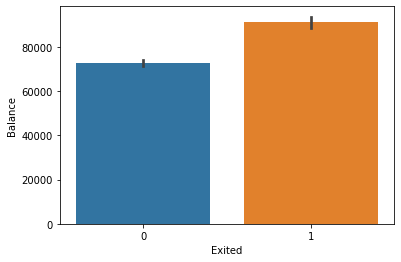

In [106]:
sns.barplot(data=DF, x='Exited', y='Balance')

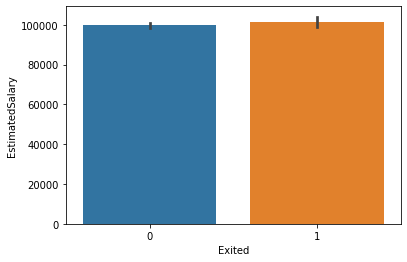

In [104]:
sns.barplot(data=DF, x='Exited', y='EstimatedSalary')